In [2]:
### Changing Frequency 
import pandas as pd
import numpy as np
import yfinance as yf
# download data
df = yf.download('AAPL', start='2000-01-01', 
                 end = '2010-12-31',
                auto_adjust=False, progress=False)

# keep only the adjusted close price
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close': 'adj_close'}, inplace=True)

ModuleNotFoundError: No module named 'pandas'

In [6]:
# Calculate simple returns
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

# remove redundant data
df.drop('adj_close', axis=1, inplace = True)
df.dropna(axis=0, inplace=True)

df.head()

log_rtn
Date                
2000-01-03  0.085034
2000-01-04 -0.088077
2000-01-05  0.014527
2000-01-06 -0.090514
2000-01-07  0.046281

In [13]:
#  Define the function for calculationg the realized volatility
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

In [14]:
# calclulate monthly relized volatility
df_rv = df.groupby(pd.Grouper(freq='M')).apply(realized_volatility)
df_rv.rename(columns={'log_rtn': 'rv'}, inplace=True)


In [15]:
# Annualize the values
df_rv.rv = df_rv.rv * np.sqrt(12)

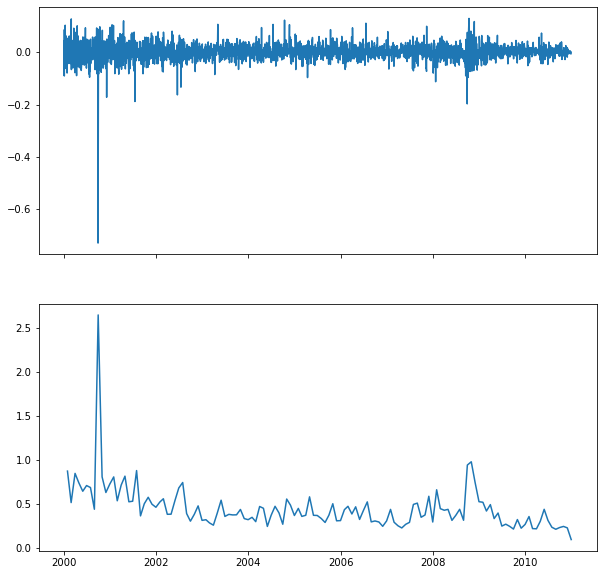

In [17]:
# Plot the results:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10,10))
ax[0].plot(df)
ax[1].plot(df_rv)
plt.show()

In [18]:
### Visualizing time series data

In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Getting Ready 

In [5]:
import pandas as pd 
import numpy as np
import yfinance as yf
# download data sa pandas data Frame
df = yf.download('MSFT', auto_adjust=False, progress=False)
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close': 'adj_close'}, inplace=True)

df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

df.dropna(how='any', inplace=True)

In [7]:
import matplotlib.pyplot as plt

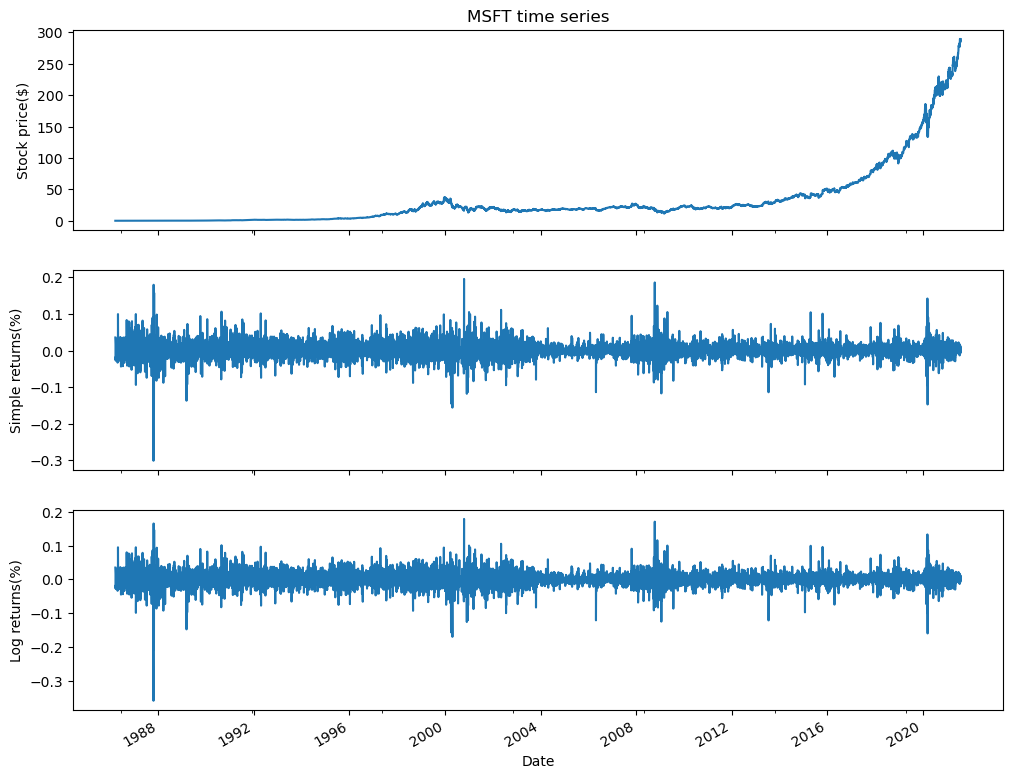

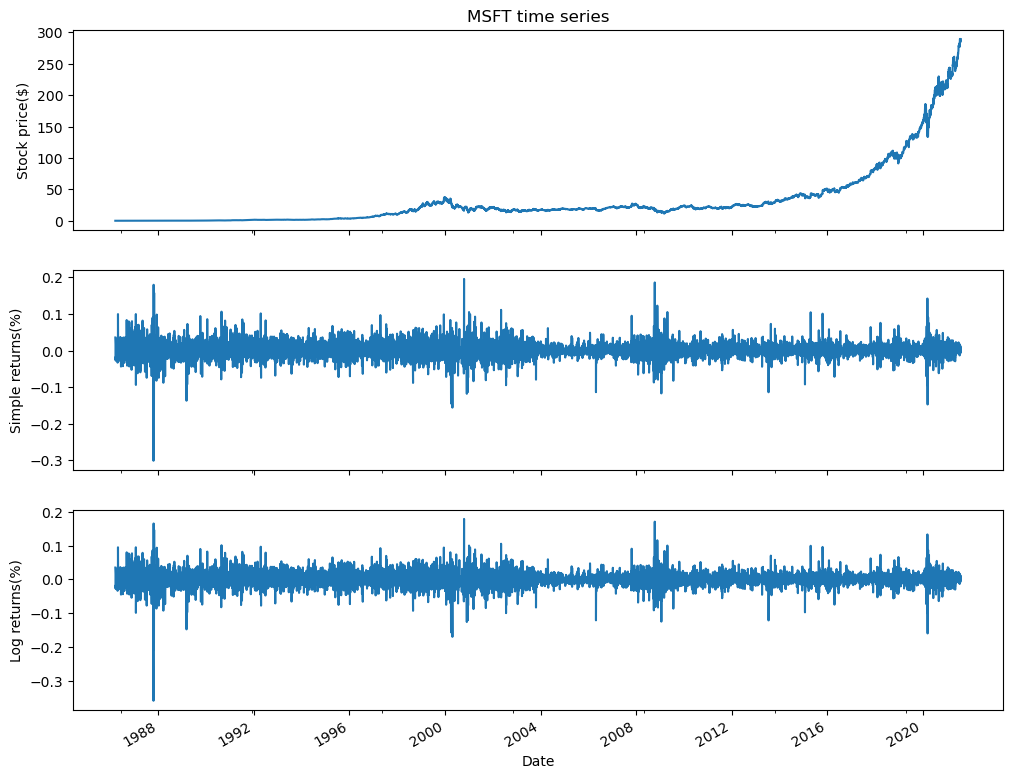

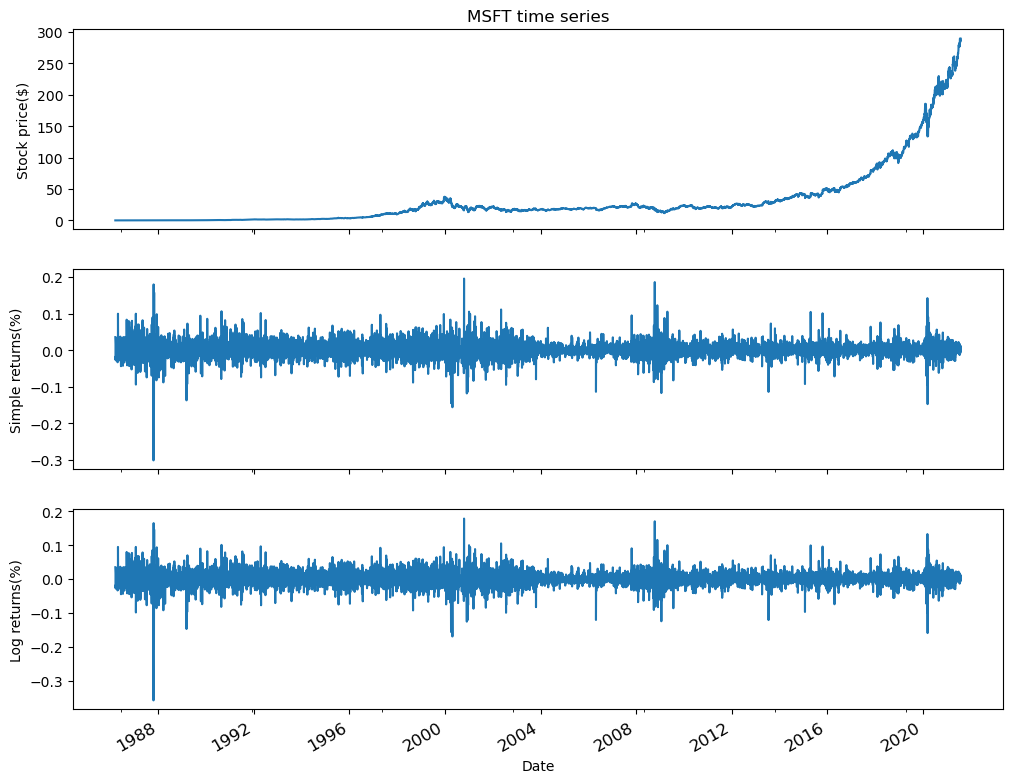

In [10]:
fig, ax = plt.subplots(3, 1, figsize=(12,10), sharex=True)

# add prices
df.adj_close.plot(ax=ax[0])
ax[0].set(title ='MSFT time series', ylabel ='Stock price($)')

#add simple returns
df.simple_rtn.plot(ax=ax[1])
ax[1].set(ylabel ='Simple returns(%)')

#add log returns
df.log_rtn.plot(ax=ax[2])
ax[2].set(ylabel ='Log returns(%)')
ax[2].tick_params(axis='x', which='major', labelsize=12)

#plt.tight_layout()
plt.show()


### Poly + Cufflinks

In [11]:
#import the libraries and handle the settings
# pip install cufflinks

SyntaxError: invalid syntax (<ipython-input-11-d6b83dc3bbea>, line 2)

In [12]:
import cufflinks as cf

In [13]:
from plotly.offline import iplot, init_notebook_mode

In [14]:
init_notebook_mode()

In [19]:
# cereate the plot
cf.set_config_file(world_readable =True, theme ='pearl', offline=True)
# configuration
df.iplot(subplots=True, shape=(3,1), shared_xaxes=True, title='MSFT time series')

In [ ]:
### The plot method of pandas: 
# plt.subplots(3,1) means Three plots vertically
# figsize means specify hte figure size
# set meat Specify the title ans axis labels on each of plots


## Plltly and cufflinks:
# subplts = True means create the previous plot
# shape=(3,1) mdans specify hte shape of the fiure
# Shared_xases=True menas indicate that the plots share the X-axis
# Title ='MSFT time series' means add the title
# kind = 'line' means by default, the selected type of plot is a line chart

# list of some libraries to create plots: 
# mathplotlib/seaborn/plotly/lotly_express/altair/plotnine


In [20]:
# indentifying outliers
import pandas as pd
import yfinance as yf
# download data
df = yf.download('AAPL', start='2000-01-01', 
                 end = '2010-12-31',
                auto_adjust=False, progress=False)

# keep only the adjusted close price
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close': 'adj_close'}, inplace=True)
df['simple_rtn'] = df.adj_close.pct_change()
df.head()

adj_close  simple_rtn
Date                             
1999-12-31   0.789364         NaN
2000-01-03   0.859423    0.088754
2000-01-04   0.786965   -0.084310
2000-01-05   0.798481    0.014633
2000-01-06   0.729382   -0.086538

In [21]:
df_rolling = df[['simple_rtn']].rolling(window=21).agg(['mean','std'])
df_rolling.columns =df_rolling.columns.droplevel()


In [22]:
# join the rolling metrics to orginal data:
df_outliers = df.join(df_rolling)

In [27]:
# define a function for detecting outliers:
def indentify_outliers(row, n_sigmas=3):
    
  #  Function for identifying the outliers using the 3 sigma rule.
   # The row must contain the following columns/indices: simple_rtn, mean, std.
        
    #    Parameters
      #   ----------
        # row : pd.Series
        # A row of a pd.DataFrame, over which the function can be applied.
        # n_sigmas : int
         #    The number of standard deviations avove/below the mean- used for detecting outliers 
            
          #   Returns
            # -------
             #0/1 : int 
             #An integer with 1 indicating an outlier and o otherwise.
            
            x = row['simple_rtn']
            mu = row['mean']
            sigma = row['std']
            
            if (x> mu + 3 * sigma) | (x< mu + 3 * sigma):
                return 1 
            else:
                return 0
    # f(x) = 1 the observation is considered an outlier otherwise 0
            

In [28]:
# Identify the outliers and extract their values for later use
df_outliers['outlier']= df_outliers.apply(indentify_outliers, axis=1)
outliers = df_outliers.loc[df_outliers['outlier']==1, ['simple_rtn']]

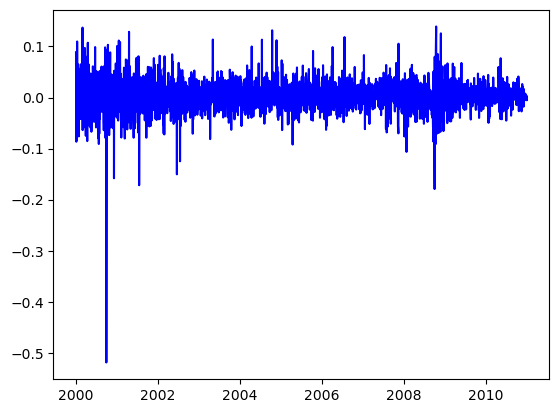

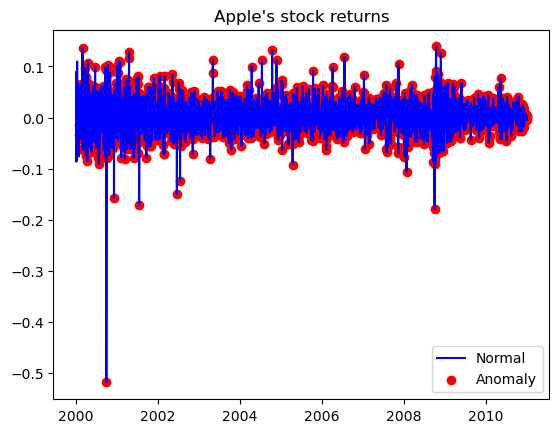

In [33]:
# plot the results:
fig, ax= plt.subplots()
ax.plot(df_outliers.index, df_outliers.simple_rtn, color='blue', label='Normal')
ax.scatter(outliers.index, outliers.simple_rtn, color='red', label='Anomaly')
ax.set_title("Apple's stock returns")
ax.legend(loc='lower right')

# plt.tight_layout()
plt.show()

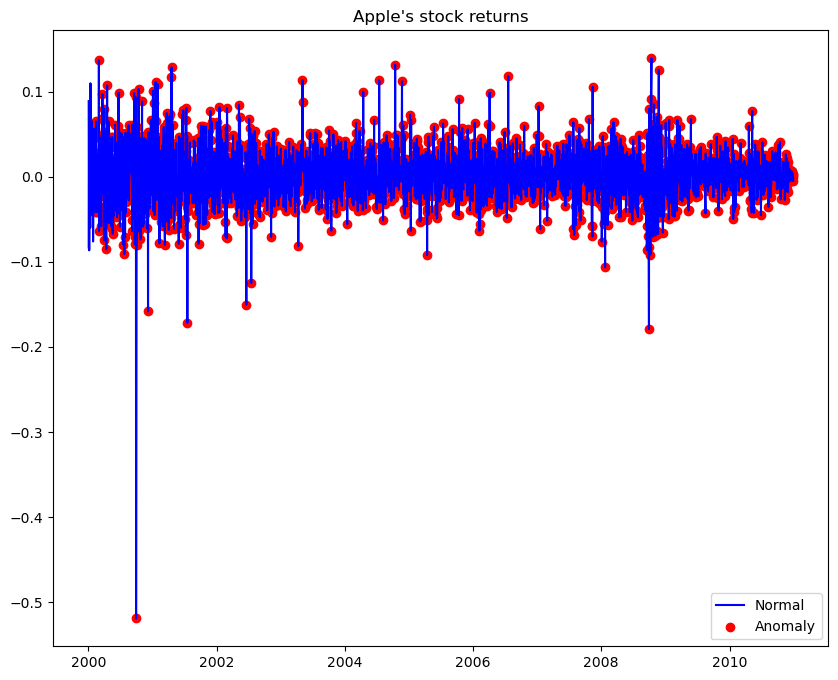

In [34]:
fig, ax= plt.subplots(figsize=(10,8))
ax.plot(df_outliers.index, df_outliers.simple_rtn, color='blue', label='Normal')
ax.scatter(outliers.index, outliers.simple_rtn, color='red', label='Anomaly')
ax.set_title("Apple's stock returns")
ax.legend(loc='lower right')

# plt.tight_layout()
plt.show()

### Investigating stylized facts of asset returns

1. import the libraries

In [7]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt


2. Download the S&P 500 data and calculate the returns:

In [10]:
df = yf.download("^GSPC", start="1985-01-01", end="2018-12-31", progress= False)
df = df[['Adj Close']].rename(columns={'Adj Close':'adj_close'})
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))
df = df[['adj_close', 'log_rtn']].dropna(how='any')


### Fact 1- Non-Gaussian distribution of returns
Negative skewness (3rd momnent): Large negative returns occur more frequently than large positive ones.
Excess kurtosis (4th moment) : Large (and small) returns occur more often than expected.
Parts of investigating this fact:
* Histogram of returns
* Q-Q Plot
* Descriptive statistics

1. calculate the Normal PDF using the mean and standard deviation of the observed returns:

In [12]:
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

2. Plot the histrogram and the Q-Q Plot

C:\Users\USER\anaconda33\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda33\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


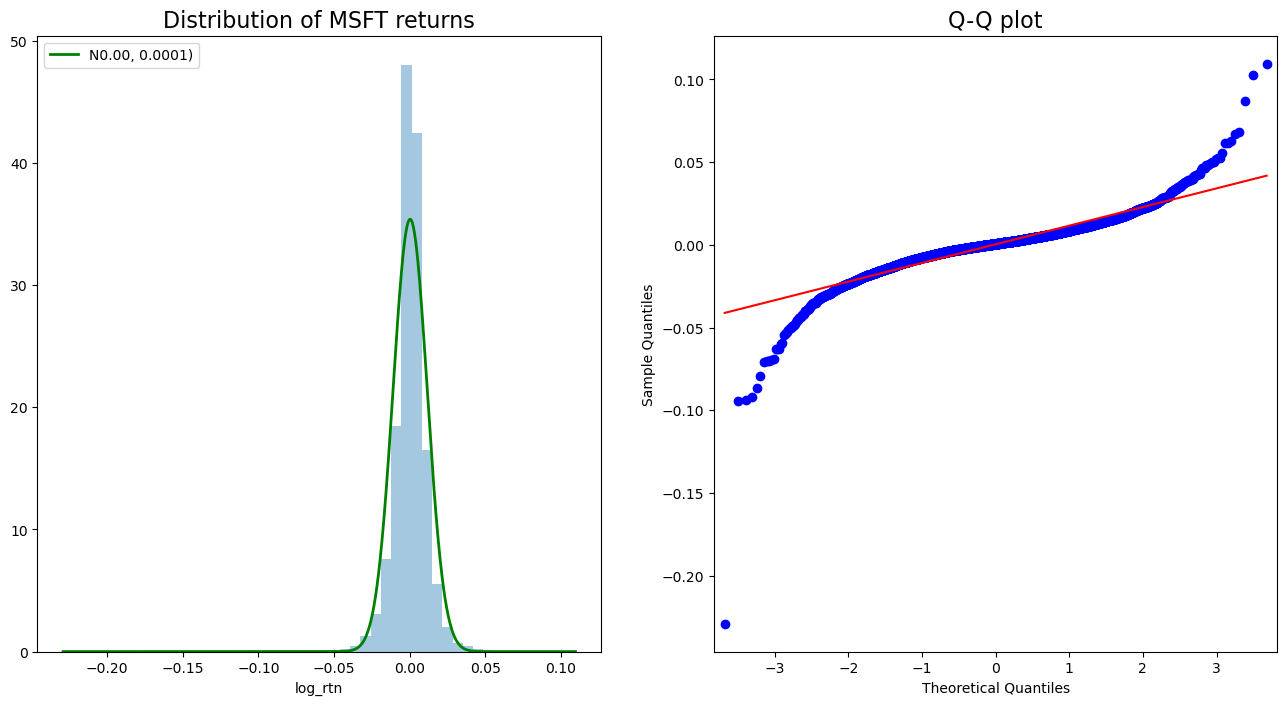

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(16,8))
# histrogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('Distribution of MSFT returns', fontsize=16)
ax[0].plot(r_range, norm_pdf, 'g', lw=2, label=f'N{mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');
# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize=16)
# plt.tight_layout()
plt.show()

3. Print the summary statistics of the log returns:

In [18]:
jb_test = scs.jarque_bera(df.log_rtn.values)
print('------------ Descriptive Statistics -------')
print('Range of dates:', min(df.index.date), '-', max(df.index.date))
print('Number of observations:', df.shape[0])
print(f'Mean: {df.log_rtn.mean():.4f}')
print(f'Median: {df.log_rtn.median():.4f}')
print(f'Min: {df.log_rtn.min():.4f}')
print(f'Max: {df.log_rtn.max():.4f}')
print(f'Standard Deviation: {df.log_rtn.std():.4f}')
print(f'Skewness: {df.log_rtn.skew():.4f}')
print(f'Kurtosis: {df.log_rtn.kurtosis():.4f}')
print(f'Jarque-Bera Statistic: {jb_test[0]:.2f} with p-value: {jb_test[1]:.2f}')


------------ Descriptive Statistics -------
Range of dates: 1985-01-02 - 2018-12-28
Number of observations: 8569
Mean: 0.0003
Median: 0.0006
Min: -0.2290
Max: 0.1096
Standard Deviation: 0.0113
Skewness: -1.2624
Kurtosis: 28.0111
Jarque-Bera Statistic: 282076.61 with p-value: 0.00
